In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn import preprocessing


from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,IsolationForest
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score,mean_squared_error


In [4]:
class pred_analysis:
    def __init__(self):
      pass

    def details(self,df,target):                         #No return
      print("shape=",df.shape)
      print("\n")
      print("duplicates=")
      print(df[df.duplicated()].count())
      print("\n")
      print("Nulls=")
      print(df.isnull().sum())
      print("\n")
      print("balance=")
      print(df[target].value_counts())

    def balance(self,df,target):

      df1=df[df[target]==0]
      df2=df[df[target]==1]

      plt.bar(["0","1"],[df1.shape[0],df2.shape[0]])
      plt.ylabel("Count of patients")
      plt.title("Unbalanced dataset")
      plt.show()

      mini=min(df[target].value_counts().values)
      maxi=max(df[target].value_counts().values)
      if len(df1)>len(df2):
        df1_new=resample(df1,random_state=42,replace=True,n_samples=mini)
        df=pd.concat([df1_new,df2])
        plt.bar(["0","1"],[df1_new.shape[0],df2.shape[0]])
        plt.ylabel("Count of patients")
        plt.title("Unbalanced dataset")
        plt.show()
      else:
        df2_new=resample(df2,random_state=42,replace=True,n_samples=mini)
        df=pd.concat([df1,df2_new])
        plt.bar(["0","1"],[df1.shape[0],df2_new.shape[0]])
        plt.ylabel("Count of patients")
        plt.title("Unbalanced dataset")
        plt.show()
      print("After Balancing=")
      print(df[target].value_counts())

      return df

    def preprocess(self,df,target):
      if "Unnamed: 0" in df.columns:
        df=df.drop("Unnamed: 0",axis=1)
      df.fillna(method="ffill",inplace=True)
      df.drop_duplicates(inplace=True)
      print("Preprocessing completed")
      return df

    def check_outliers(self,df):
      num_col=df.columns[df.dtypes!=object]
      for i in num_col:
        sns.boxplot(df[i])
        plt.title(i)
        plt.show()

    def correlation_order(self,df,val):
      print(val)
      x=df.corr()[val].sort_values(ascending=False)[1:]
      plt.bar(x.index, x.values)
      plt.xticks(rotation=90)
      plt.xlabel("Features")
      plt.ylabel("Correlation with target")
      plt.title("Correlation")
      plt.show()


    def remove_outliers(self,df):
      num_col=df.columns[df.dtypes!=object]
      for i in num_col:
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        med=df[i].median()
        df[i]=np.where((df[i]<q1-(1.5*iqr)) | (df[i]>q3+(1.5*iqr)),med,df[i])
      return df

    def encoder(self,df,lst):                                 #  No return
      for i in lst:
        df[i]=preprocessing.LabelEncoder().fit_transform(df[i])

    def data_split(self,df,target,size):
      X=df.drop(columns=[target])
      y=df[target]
      x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=size,random_state=42)
      print(f'Records in dataset: {df.shape[0]}')
      print(f'Records in train dataset: {x_train.shape[0]}')
      print(f'Records in test dataset: {x_test.shape[0]}')
      return (x_train,x_test,y_train,y_test)

    def metrics(self,y_test,res):
      print(f"Accuracy score={accuracy_score(y_test,res)*100}")
      print(f"precision={precision_score(y_test,res)}")
      print(f"Recall={recall_score(y_test,res)*100}")
      print(f"F1 score={f1_score(y_test,res)*100}")
      print(f"Confusion Matrix=")
      conf_matrix=confusion_matrix(y_test,res)
      sns.heatmap(conf_matrix,annot=True)
      plt.show()

    def model_execute(self,models,tup):
      x_train,x_test,y_train,y_test=tup
      for mod in models:
        clf=models[mod]
        clf.fit(x_train,y_train)
        file_ = mod+".pkl"
        with open(file_,'wb') as file:
          pickle.dump(clf,file)
        res=clf.predict(x_test)
        print(f"{clf}")
        print("\n")
        self.metrics(y_test,res)

In [5]:
df=pd.read_csv("diabetes_combined_new.csv")
df.head()

,d_patient_id,d_name,m_age,d_gender,d_postoffice_name,d_pincode,d_districts_name,d_state_name,m_HbA1c_level,m_blood_glucose_level,m_bmi,d_hypertension,d_heart_disease,d_smoking_history,d_diabetes,d_risk_factor
0,1,shivani,80.0,female,abdullapuram,632010,vellore,tamilnadu,6.6,140,25.19,0,1,never,0,8
1,36,sunita,5.0,male,abiramam,623601,sivaganga,tamilnadu,5.8,85,15.10,0,0,no info,0,4
2,50,pooja,3.0,female,abiramapuram,600018,chennai,tamilnadu,6.5,100,19.27,0,0,no info,0,7
3,92,fooljhnah,44.0,female,abiviethiswaram,613706,thanjavur,tamilnadu,5.7,145,37.35,0,0,never,0,5
4,97,pooja,67.0,female,achalpuram,609101,cuddalore,tamilnadu,6.2,159,27.32,0,0,never,1,5


In [6]:
obj = pred_analysis()

In [7]:
target="d_diabetes"

In [8]:
obj.details(df,target)

shape= (100000, 16)


duplicates=
d_patient_id             0
d_name                   0
m_age                    0
d_gender                 0
d_postoffice_name        0
d_pincode                0
d_districts_name         0
d_state_name             0
m_HbA1c_level            0
m_blood_glucose_level    0
m_bmi                    0
d_hypertension           0
d_heart_disease          0
d_smoking_history        0
d_diabetes               0
d_risk_factor            0
dtype: int64


Nulls=
d_patient_id             0
d_name                   0
m_age                    0
d_gender                 0
d_postoffice_name        0
d_pincode                0
d_districts_name         0
d_state_name             0
m_HbA1c_level            0
m_blood_glucose_level    0
m_bmi                    0
d_hypertension           0
d_heart_disease          0
d_smoking_history        0
d_diabetes               0
d_risk_factor            0
dtype: int64


balance=
d_diabetes
0    91500
1     8500
Name: count, dtype: int

In [9]:
df=obj.preprocess(df,target)

Preprocessing completed


C:\Users\Ajay.N.lv\AppData\Local\Temp\ipykernel_32804\1529449407.py:51: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill",inplace=True)


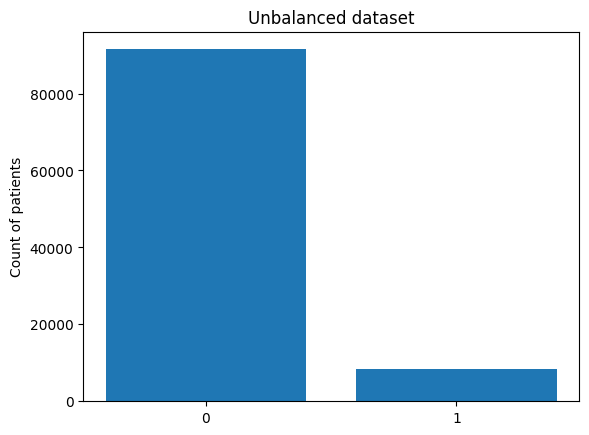

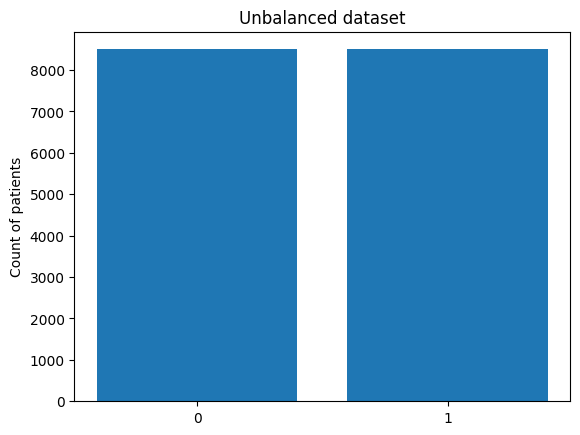

After Balancing=
d_diabetes
0    8500
1    8500
Name: count, dtype: int64


In [10]:
df=obj.balance(df,target)  #Balance the Dataset

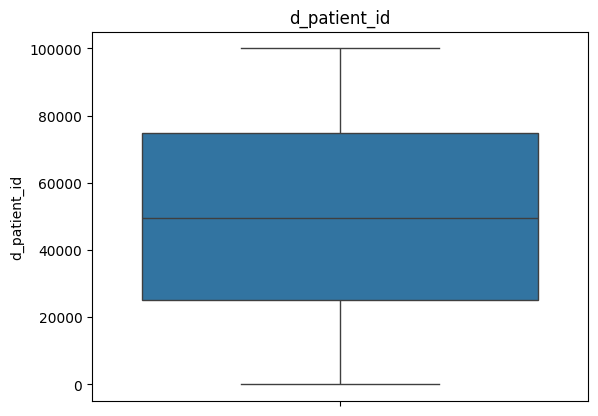

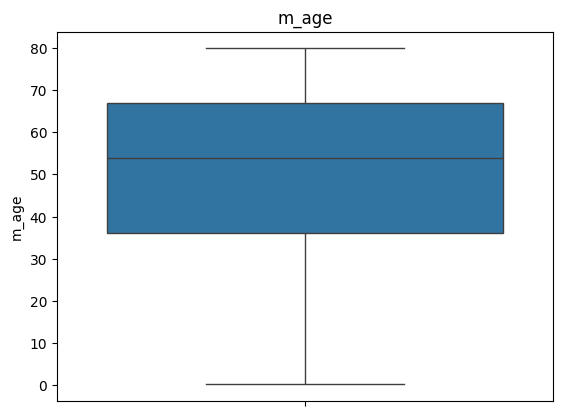

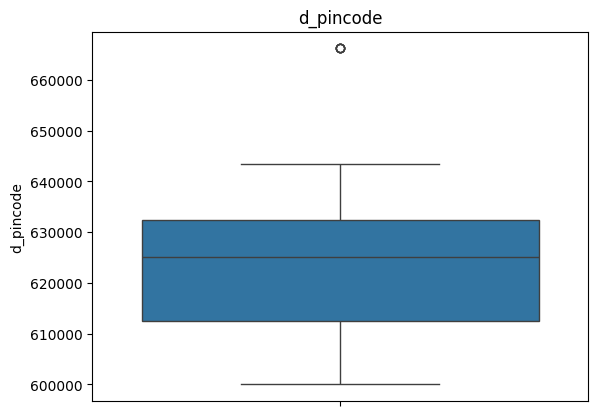

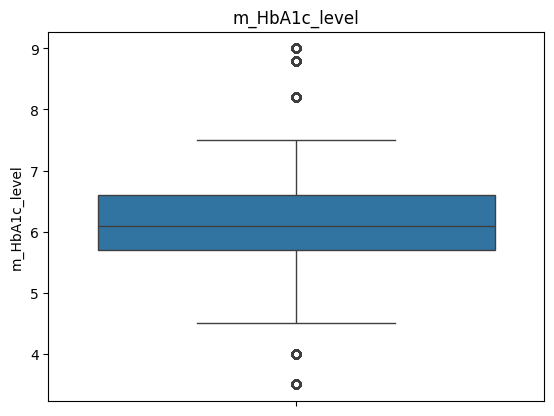

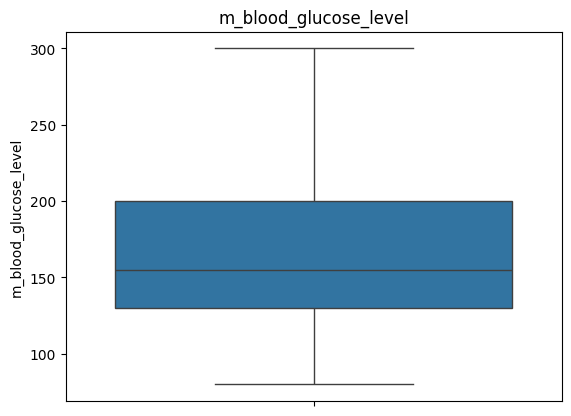

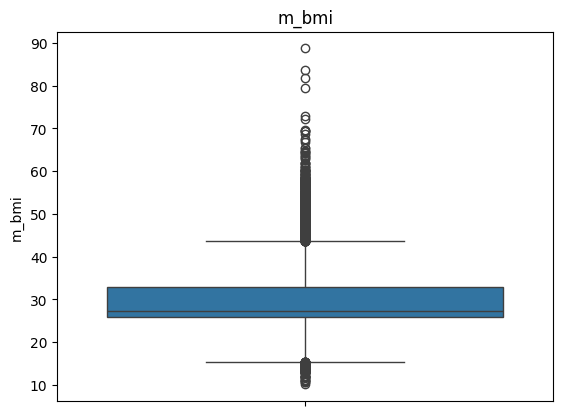

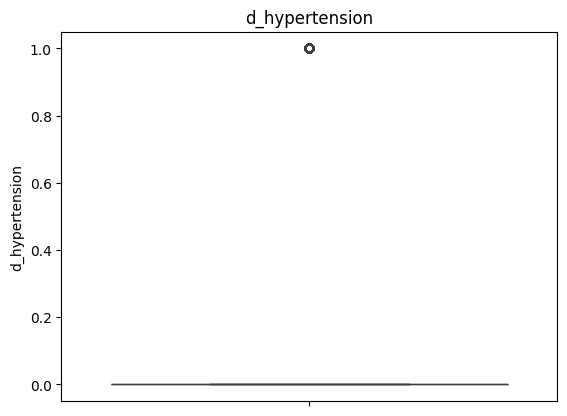

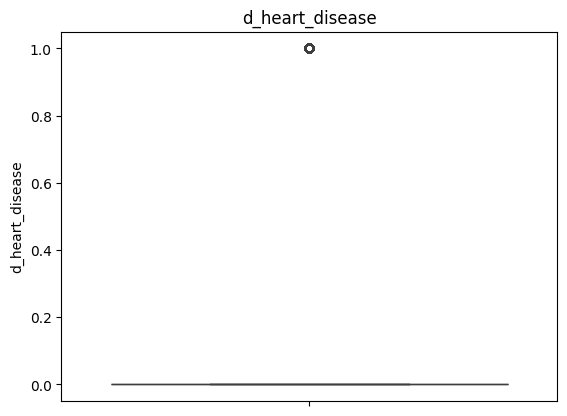

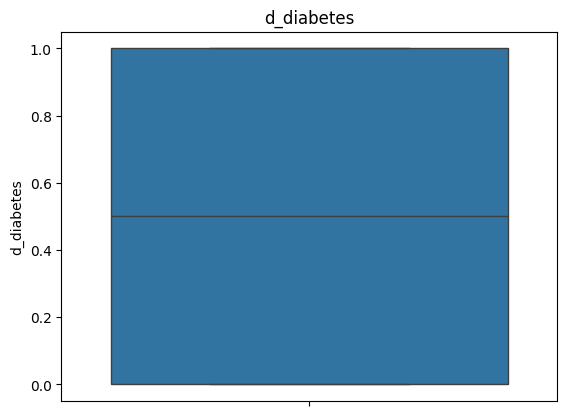

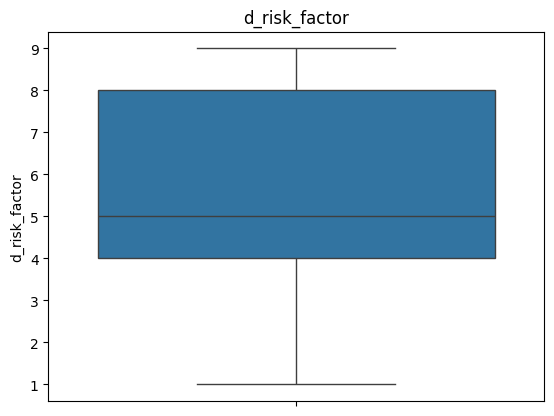

In [11]:
obj.check_outliers(df)

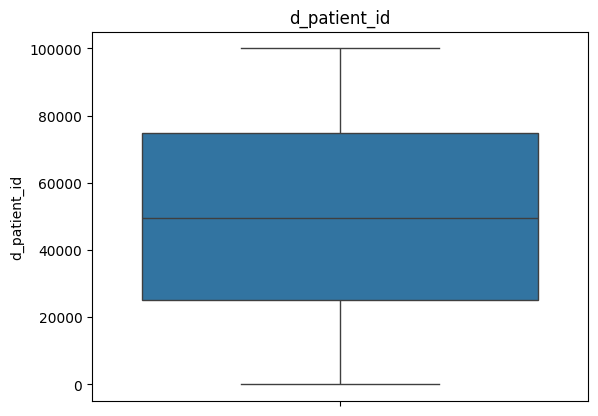

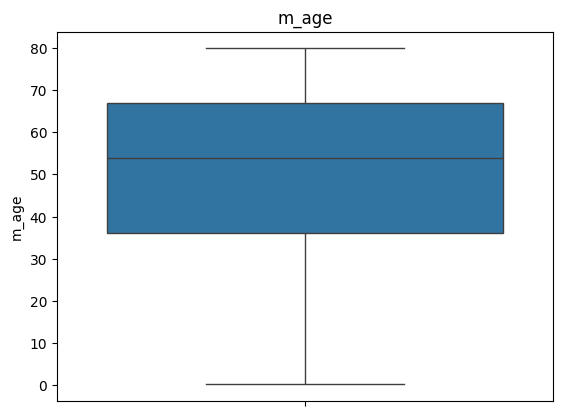

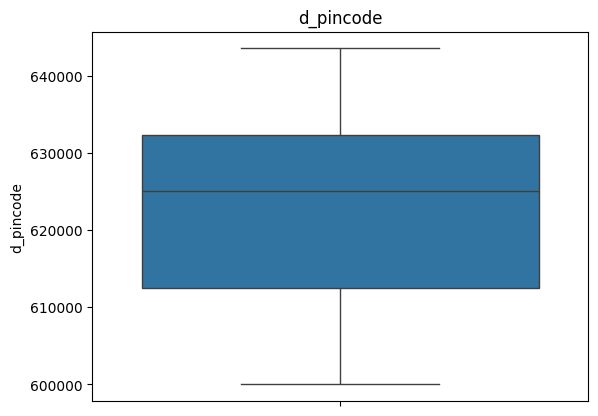

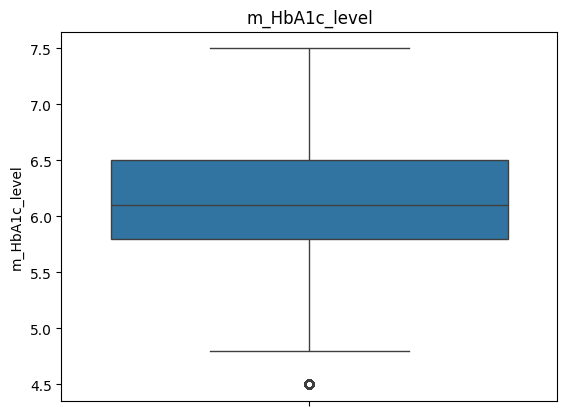

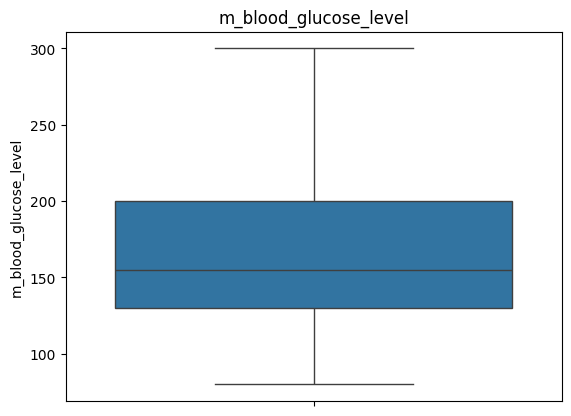

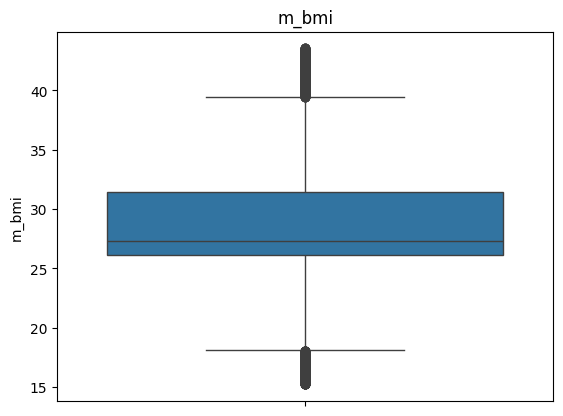

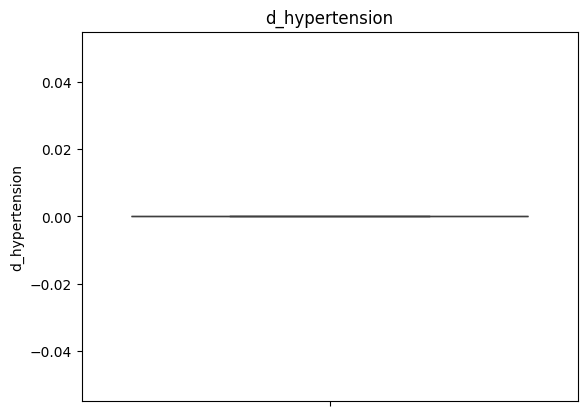

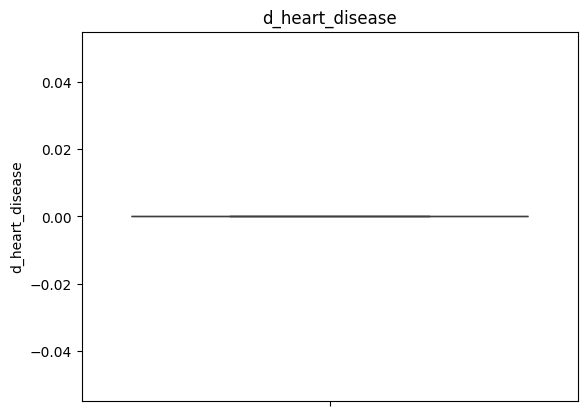

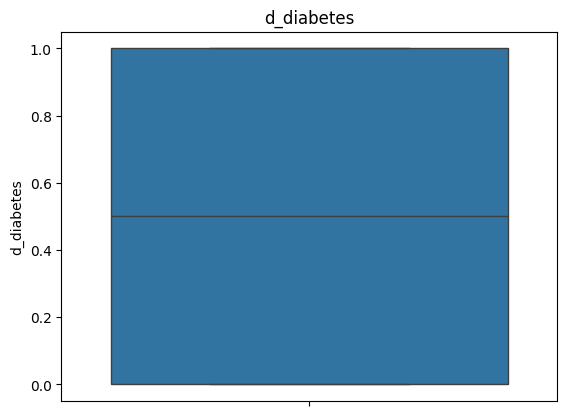

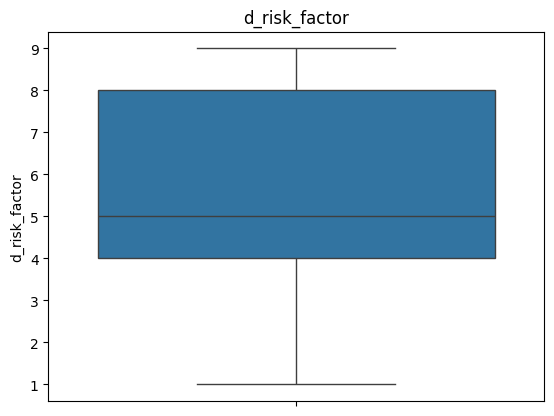

In [12]:
cols = ['m_bmi', 'm_HbA1c_level']     #Remove Outliers
df=obj.remove_outliers(df)
obj.check_outliers(df)

In [13]:
cols_to_be_encoded = ["d_smoking_history","d_gender"]
obj.encoder(df, cols_to_be_encoded)
df.head()

,d_patient_id,d_name,m_age,d_gender,d_postoffice_name,d_pincode,d_districts_name,d_state_name,m_HbA1c_level,m_blood_glucose_level,m_bmi,d_hypertension,d_heart_disease,d_smoking_history,d_diabetes,d_risk_factor
17278,24294.0,ajay kumar,6.0,2,pamani,614014.0,thanjavur,tamilnadu,4.8,90.0,18.96,0.0,0.0,4,0.0,1.0
942,35064.0,sonali,36.0,2,kallakurichi h o,606202.0,vellore,tamilnadu,5.8,90.0,27.32,0.0,0.0,4,0.0,4.0
83936,14551.0,rani,68.0,1,gandhi nagar east,632006.0,vellore,tamilnadu,6.1,130.0,28.29,0.0,0.0,2,0.0,1.0
59991,64623.0,manisha,11.0,1,tirumangalakudi,612102.0,thanjavur,tamilnadu,6.1,100.0,26.26,0.0,0.0,3,0.0,1.0
6849,50237.0,ajay kumar,24.0,1,thanjavur bazar,613001.0,thanjavur,tamilnadu,5.8,200.0,27.32,0.0,0.0,3,0.0,6.0


#Check whether data is linear or non-linear


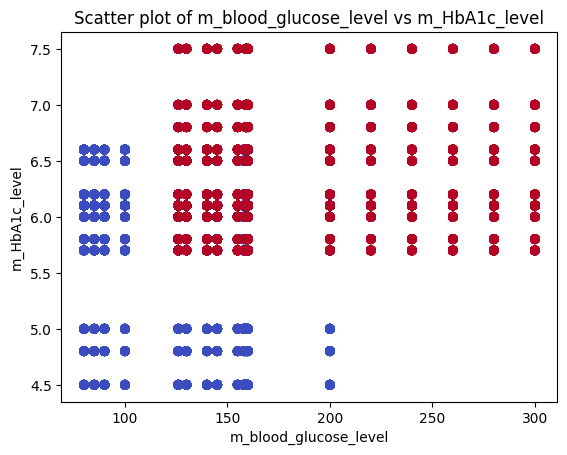

In [14]:
plt.scatter(df['m_blood_glucose_level'], df['m_HbA1c_level'], c=df['d_diabetes'], cmap='coolwarm')
plt.xlabel('m_blood_glucose_level')
plt.ylabel('m_HbA1c_level')
plt.title('Scatter plot of m_blood_glucose_level vs m_HbA1c_level')
plt.show()

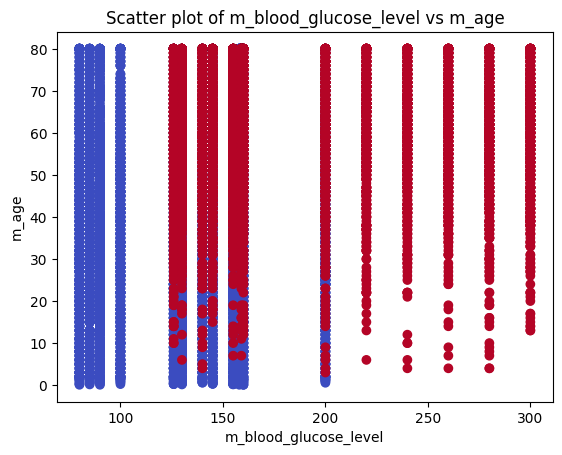

In [15]:
plt.scatter(df['m_blood_glucose_level'], df['m_age'], c=df['d_diabetes'], cmap='coolwarm')
plt.xlabel('m_blood_glucose_level')
plt.ylabel('m_age')
plt.title('Scatter plot of m_blood_glucose_level vs m_age')
plt.show()

In [16]:
num_cols = df.columns[df.dtypes!=object]
selected_features = [ 'm_age', 'm_HbA1c_level',
       'm_blood_glucose_level', 'm_bmi', 'd_hypertension', 'd_heart_disease','d_risk_factor',"d_diabetes"]
# sns.pairplot(df[selected_features],hue="d_diabetes", palette="magma", height=3.5)
# plt.tight_layout()


In [26]:
df.head()

,m_age,m_HbA1c_level,m_blood_glucose_level,m_bmi,d_hypertension,d_heart_disease,d_diabetes,d_risk_factor
17278,6.0,4.8,90.0,18.96,0.0,0.0,0.0,1.0
942,36.0,5.8,90.0,27.32,0.0,0.0,0.0,4.0
83936,68.0,6.1,130.0,28.29,0.0,0.0,0.0,1.0
59991,11.0,6.1,100.0,26.26,0.0,0.0,0.0,1.0
6849,24.0,5.8,200.0,27.32,0.0,0.0,0.0,6.0


d_diabetes


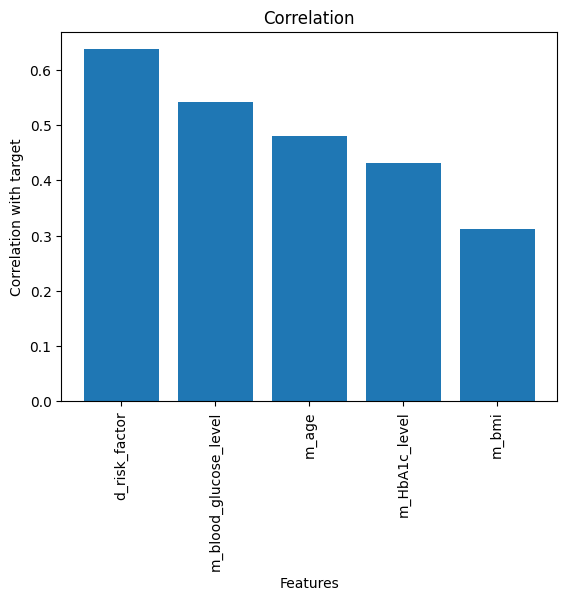

In [20]:
obj.correlation_order(df[selected_features],"d_diabetes")

In [27]:
df.head()

,m_age,m_HbA1c_level,m_blood_glucose_level,m_bmi,d_hypertension,d_heart_disease,d_diabetes,d_risk_factor
17278,6.0,4.8,90.0,18.96,0.0,0.0,0.0,1.0
942,36.0,5.8,90.0,27.32,0.0,0.0,0.0,4.0
83936,68.0,6.1,130.0,28.29,0.0,0.0,0.0,1.0
59991,11.0,6.1,100.0,26.26,0.0,0.0,0.0,1.0
6849,24.0,5.8,200.0,27.32,0.0,0.0,0.0,6.0


In [21]:
df.drop(columns=["d_patient_id","d_gender","d_pincode","d_smoking_history"],inplace=True)
df.drop(columns=df.columns[df.dtypes==object],inplace=True)
df.head()

,m_age,m_HbA1c_level,m_blood_glucose_level,m_bmi,d_hypertension,d_heart_disease,d_diabetes,d_risk_factor
17278,6.0,4.8,90.0,18.96,0.0,0.0,0.0,1.0
942,36.0,5.8,90.0,27.32,0.0,0.0,0.0,4.0
83936,68.0,6.1,130.0,28.29,0.0,0.0,0.0,1.0
59991,11.0,6.1,100.0,26.26,0.0,0.0,0.0,1.0
6849,24.0,5.8,200.0,27.32,0.0,0.0,0.0,6.0


Predictive Analysis

In [28]:
x_train,x_test,y_train,y_test=obj.data_split(df,target,0.3)
print(x_test)

Records in dataset: 17000
Records in train dataset: 11900
Records in test dataset: 5100
       m_age  m_HbA1c_level  m_blood_glucose_level  m_bmi  d_hypertension  \
28701   57.0            7.5                  155.0  27.32             0.0   
95331   12.0            5.8                  158.0  15.46             0.0   
21134   73.0            6.1                  300.0  29.37             0.0   
20484   24.0            6.0                   90.0  32.06             0.0   
88097   11.0            6.5                  130.0  27.32             0.0   
...      ...            ...                    ...    ...             ...   
80644    4.0            6.2                  145.0  19.20             0.0   
12732   67.0            6.1                  240.0  27.32             0.0   
24012   72.0            6.5                  220.0  40.82             0.0   
4703    37.0            6.1                  126.0  23.13             0.0   
32756   79.0            6.5                  158.0  27.32        

In [29]:
# x=StandardScaler()

# X_train=x.fit_transform(x_train)
# X_test=x.transform(x_test)
clf = SVC(kernel="rbf",gamma=0.05,C=1000)
clf.fit(x_train, y_train)
with open("svc.pkl",'wb') as file:
    pickle.dump(clf,file)
res=clf.predict(x_test)

Accuracy score=83.45098039215686
precision=0.8241167434715821
Recall=84.75513428120063
F1 score=83.56697819314641
Confusion Matrix=


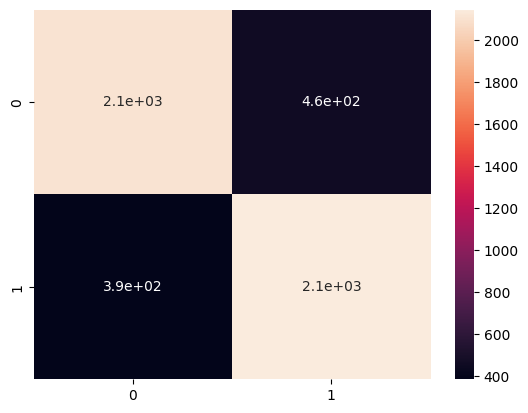

In [30]:
obj.metrics(y_test,res)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()


Accuracy score=85.66666666666667
precision=0.8462129950019224
Recall=86.92733017377567
F1 score=85.7588155075005
Confusion Matrix=


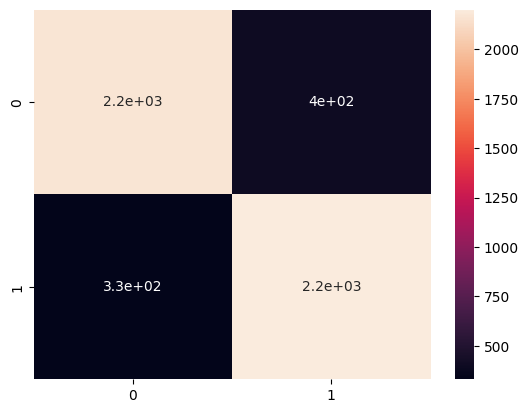

RandomForestClassifier()


Accuracy score=88.7843137254902
precision=0.8819173811379579
Recall=89.37598736176935
F1 score=88.77991369164377
Confusion Matrix=


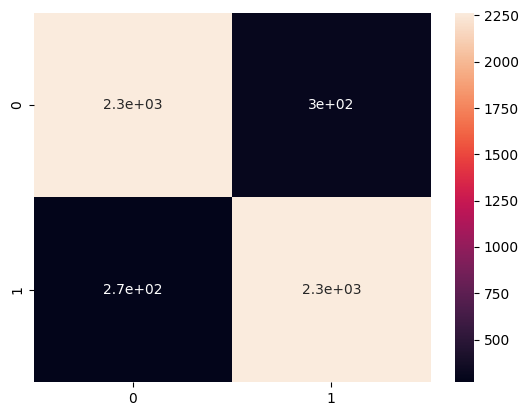

DecisionTreeClassifier()


Accuracy score=87.27450980392157
precision=0.8690709525676206
Recall=87.55924170616115
F1 score=87.23194963604172
Confusion Matrix=


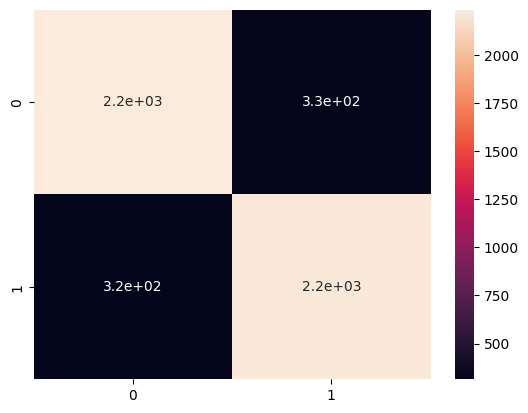

KNeighborsClassifier()


Accuracy score=86.86274509803921
precision=0.85
Recall=89.29699842022117
F1 score=87.09553158705701
Confusion Matrix=


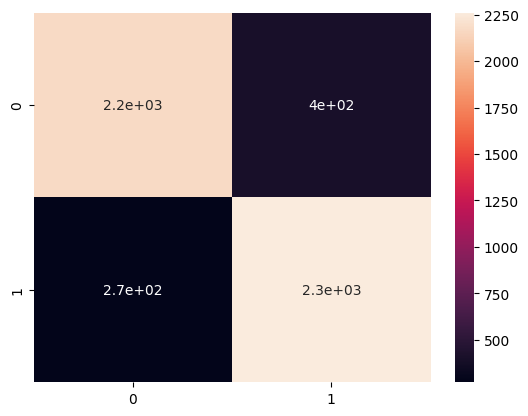

GaussianNB()


Accuracy score=83.88235294117648
precision=0.8332034294621979
Recall=84.4391785150079
F1 score=83.87602981561396
Confusion Matrix=


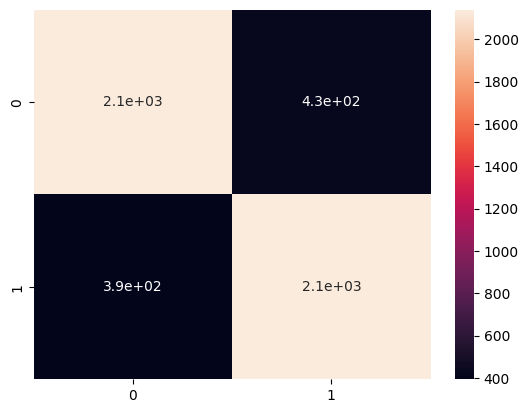

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)


Accuracy score=86.9607843137255
precision=0.870583564906709
Recall=86.61137440758294
F1 score=86.83429023955652
Confusion Matrix=


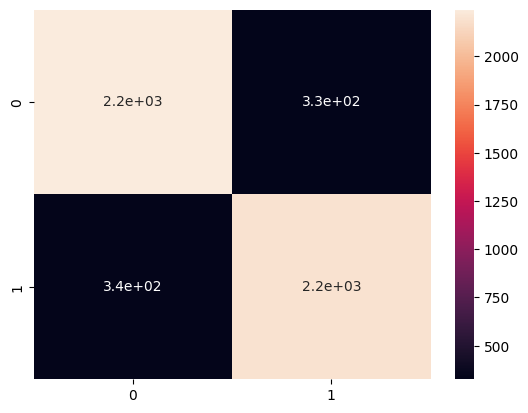

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


Accuracy score=89.90196078431373
precision=0.8830231674895557
Recall=91.82464454976304
F1 score=90.02904162633108
Confusion Matrix=


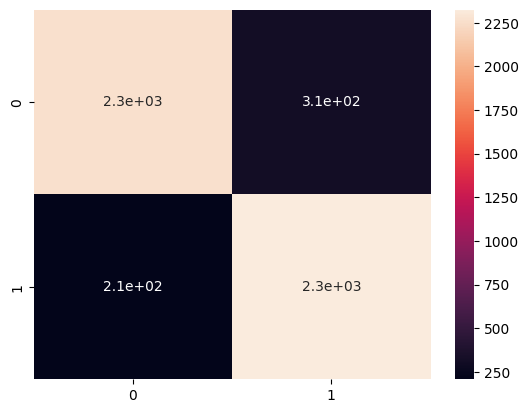

In [ ]:
dec=DecisionTreeClassifier()
models={"Logreg":LogisticRegression(),"Rf":RandomForestClassifier(),"dt":dec,"knn":KNeighborsClassifier(),"Naive Bayes": GaussianNB(),
        "ada":AdaBoostClassifier(base_estimator=dec,n_estimators=50,random_state=42),"xgb":XGBClassifier()}
obj.model_execute(models,(x_train,x_test,y_train,y_test))